# IFT 6758 - Devoir 2

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Commencez par utiliser les fonctions créées dans `q1.py` pour rendre les données plus informatives et lisibles. Concrètement, remplissez les cellules suivantes :


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [3]:
# Charger le fichier `audio_segments.csv` dans un DataFrame `df`
df = pd.read_csv('data/audio_segments.csv')

In [4]:
# Ajouter une colonne correspondant au nombre d'étiquettes appelée `label_count`
# Ici, il y a un problème ennuyeux avec l'accès à la colonne positive_labels

# there is a space before the columns : ' start_seconds', ' end_seconds', ' positive_labels'

# df.rename(columns={
#     '# YTID': 'YTID',
#     ' start_seconds': 'start_seconds',
#     ' end_seconds': 'end_seconds',
#     ' positive_labels': 'positive_labels'
# }, inplace=True)

df['label_count'] = df[' positive_labels'].apply(count_labels)

In [5]:
# Ajouter une nouvelle colonne appelée `label_names` avec les noms d'étiquette traités au lieu de l'ID d'étiquette

# Imprimer le temps pris pour cette opération (soit en utilisant le module time ou timeit).
# Puisque nous n'exécutons ce code qu'une fois, ce n'est pas très problématique que cela prenne quelques minutes.
# Cependant, pour un ensemble de données plus volumineux, cela vaudrait la peine de l'accélérer
# (par exemple en créant un dictionnaire ID -> nom une fois et en l'utilisant).
start_time = time.perf_counter()

df['label_names'] = df[' positive_labels'].apply(convert_ids)

end_time = time.perf_counter()
print(f"Time: {end_time - start_time} seconds")

Time: 0.03930150000087451 seconds


In [6]:
# Affichez le DataFrame et enregistrez-le dans `audio_segments_clean.csv` (sans index)
df.to_csv('audio_segments_clean.csv', index=False)
df

,# YTID,start_seconds,end_seconds,positive_labels,label_count,label_names
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk",4,"Domestic animals, pets|Squeak|Dog|Animal"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g,1,Hammer
2,--U7joUcTCo,0.0,10.0,/m/01b_21,1,Cough
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005",4,Music|Speech|Female singing|Child singing
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001",3,"Chuckle, chortle|Belly laugh|Baby laughter"
...,...,...,...,...,...,...
20366,zyF8TGSRvns,150.0,160.0,"/m/0dwsp,/m/0dwtp,/m/0f8s22,/m/0j45pbj",4,"Marimba, xylophone|Glockenspiel|Chime|Mallet p..."
20367,zz35Va7tYmA,30.0,40.0,"/m/012f08,/m/07q2z82,/m/07qmpdm,/m/0k4j",4,"Motor vehicle (road)|Accelerating, revving, vr..."
20368,zzD_oVgzKMc,30.0,40.0,/m/07pn_8q,1,Chopping (food)
20369,zzNdwF40ID8,70.0,80.0,"/m/04rlf,/m/0790c",2,Music|Sonar


### b)

Ensuite, à l'aide du DataFrame propre, remplissez les cellules suivantes pour mieux comprendre la distribution des étiquettes dans l'ensemble de données. Pour chaque graphique ci-dessous, assurez-vous d'inclure les **noms d'axe** appropriés et un **titre**.

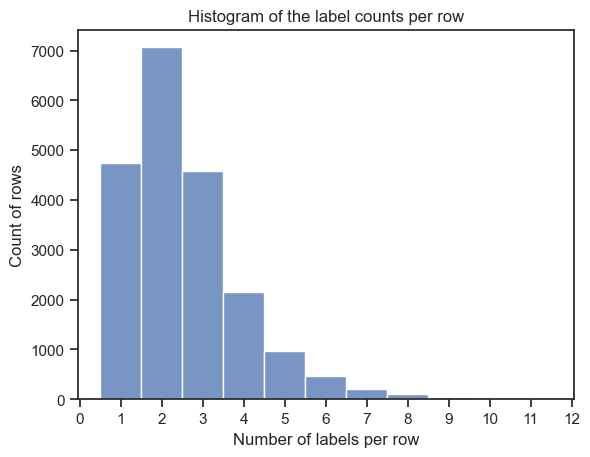

In [7]:
# À l'aide de seaborn, créez un histogramme du nombre d'étiquettes des rangées dans le DataFrame
sns.histplot(df['label_count'], discrete=True)
plt.xlabel("Number of labels per row")
plt.ylabel("Count of rows")
plt.title("Histogram of the label counts per row")
plt.locator_params(axis='x', nbins=13)
plt.show()

Suivez les étapes ci-dessous pour créer un heatmap montrant la "corrélation" entre différentes étiquettes.
- Plus précisément, chaque cellule de la heatmap doit correspondre à la probabilité qu'un échantillon avec l'étiquette de ligne correspondante ait également l'étiquette de colonne correspondante.
- Considérez simplement les étiquettes ["Piano", "Classical music", "Speech", "Conversation", "Screaming"].

Votre graphique final devrait ressembler à ceci :

![alt text](images/heatmap.png "Heatmap")

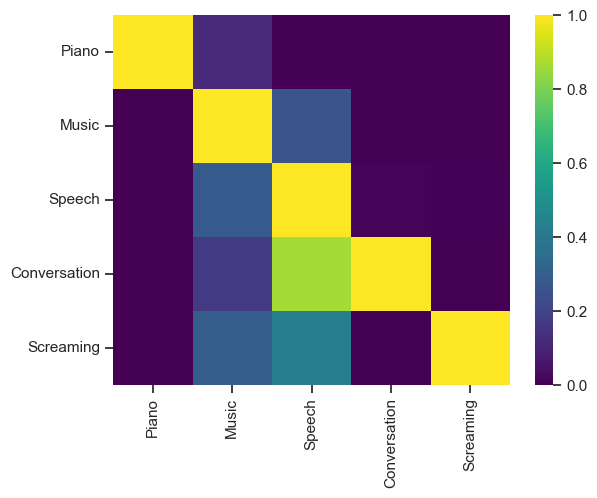

In [8]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# Il y a plusieurs façons d'aborder cela, la façon que nous recommandons ici est de construire d'abord une grille 2D où chaque
# value est la valeur de corrélation entre la ligne/colonne correspondante à l'aide des fonctions créées dans q1.py.
grid = np.zeros((5, 5))
for i, label_1 in enumerate(labels):
    for j, label_2 in enumerate(labels):
        grid[i][j] = get_correlation(df['label_names'], label_1, label_2)
        
# Ensuite, à l'aide de sns.heatmap, créez la heatmap, en profitant de xticklabels et yticklabels pour définir les noms des étiquettes comme valeurs de graduation
ax = sns.heatmap(grid, cmap="viridis")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

## Question 2
La question 2 n'a pas de composante notebook, remplissez simplement le fichier `q2.py`.

## Question 3

Téléchargez l'audio pour les étiquettes suivantes à l'aide des fonction créées dans `q3.py`

In [9]:
from q3 import data_pipeline, rename_files, filter_df

In [10]:
# Téléchargez "Cough"
label = "Cough"
data_pipeline("audio_segments_clean.csv", label)

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée
rename_files(f"{label}_cut", "audio_segments_clean.csv")

Cough:   0%|          | 0/60 [00:00<?, ?it/s]

[youtube] Extracting URL: https://www.youtube.com/watch?v=--U7joUcTCo
[youtube] --U7joUcTCo: Downloading webpage
[youtube] --U7joUcTCo: Downloading tv client config
[youtube] --U7joUcTCo: Downloading tv player API JSON
[youtube] --U7joUcTCo: Downloading web safari player API JSON
[youtube] --U7joUcTCo: Downloading m3u8 information
[info] --U7joUcTCo: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\--U7joUcTCo.webm
[download] 100% of  120.01KiB in 00:00:00 at 843.25KiB/s Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\--U7joUcTCo.mp3
Deleting original file Cough_raw\--U7joUcTCo.webm (pass -k to keep)


Cough:   2%|▏         | 1/60 [00:09<08:54,  9.06s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=0iiwZ2_9Vi8
[youtube] 0iiwZ2_9Vi8: Downloading webpage
[youtube] 0iiwZ2_9Vi8: Downloading tv client config
[youtube] 0iiwZ2_9Vi8: Downloading tv player API JSON
[youtube] 0iiwZ2_9Vi8: Downloading web safari player API JSON
[youtube] 0iiwZ2_9Vi8: Downloading m3u8 information
[info] 0iiwZ2_9Vi8: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\0iiwZ2_9Vi8.webm
[download] 100% of    1.29MiB in 00:00:00 at 4.74MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\0iiwZ2_9Vi8.mp3
Deleting original file Cough_raw\0iiwZ2_9Vi8.webm (pass -k to keep)


Cough:   3%|▎         | 2/60 [00:18<09:12,  9.52s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=0mZQ6Q-viPw
[youtube] 0mZQ6Q-viPw: Downloading webpage
[youtube] 0mZQ6Q-viPw: Downloading tv client config
[youtube] 0mZQ6Q-viPw: Downloading tv player API JSON
[youtube] 0mZQ6Q-viPw: Downloading web safari player API JSON
[youtube] 0mZQ6Q-viPw: Downloading m3u8 information
[info] 0mZQ6Q-viPw: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\0mZQ6Q-viPw.webm
[download] 100% of  478.78KiB in 00:00:00 at 2.58MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\0mZQ6Q-viPw.mp3
Deleting original file Cough_raw\0mZQ6Q-viPw.webm (pass -k to keep)


Cough:   5%|▌         | 3/60 [00:28<09:06,  9.58s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=130v5XJl8G0
[youtube] 130v5XJl8G0: Downloading webpage
[youtube] 130v5XJl8G0: Downloading tv client config
[youtube] 130v5XJl8G0: Downloading tv player API JSON
[youtube] 130v5XJl8G0: Downloading web safari player API JSON


ERROR: [youtube] 130v5XJl8G0: This video has been removed for violating YouTube's Terms of Service
Cough:   7%|▋         | 4/60 [00:29<05:39,  6.07s/it]

Download failed for 130v5XJl8G0: ERROR: [youtube] 130v5XJl8G0: This video has been removed for violating YouTube's Terms of Service
[youtube] Extracting URL: https://www.youtube.com/watch?v=1Xmw9VUzvLY
[youtube] 1Xmw9VUzvLY: Downloading webpage
[youtube] 1Xmw9VUzvLY: Downloading tv client config
[youtube] 1Xmw9VUzvLY: Downloading tv player API JSON
[youtube] 1Xmw9VUzvLY: Downloading web safari player API JSON
[youtube] 1Xmw9VUzvLY: Downloading m3u8 information
[info] 1Xmw9VUzvLY: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\1Xmw9VUzvLY.webm
[download] 100% of    4.17MiB in 00:00:00 at 8.40MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\1Xmw9VUzvLY.mp3
Deleting original file Cough_raw\1Xmw9VUzvLY.webm (pass -k to keep)


Cough:   8%|▊         | 5/60 [00:43<08:07,  8.87s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=39IZIbmQPzA
[youtube] 39IZIbmQPzA: Downloading webpage
[youtube] 39IZIbmQPzA: Downloading tv client config
[youtube] 39IZIbmQPzA: Downloading tv player API JSON
[youtube] 39IZIbmQPzA: Downloading web safari player API JSON
[youtube] 39IZIbmQPzA: Downloading m3u8 information
[info] 39IZIbmQPzA: Downloading 1 format(s): 140
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\39IZIbmQPzA.m4a
[download] 100% of    2.37MiB in 00:00:00 at 7.13MiB/s   Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\39IZIbmQPzA.m4a"
[ExtractAudio] Destination: Cough_raw\39IZIbmQPzA.mp3
Deleting original file Cough_raw\39IZIbmQPzA.m4a (pass -k to keep)


Cough:  10%|█         | 6/60 [00:52<08:10,  9.09s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=3Liy9uBgsQM
[youtube] 3Liy9uBgsQM: Downloading webpage
[youtube] 3Liy9uBgsQM: Downloading tv client config
[youtube] 3Liy9uBgsQM: Downloading tv player API JSON
[youtube] 3Liy9uBgsQM: Downloading web safari player API JSON
[youtube] 3Liy9uBgsQM: Downloading m3u8 information
[info] 3Liy9uBgsQM: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\3Liy9uBgsQM.webm
[download] 100% of    1.19MiB in 00:00:00 at 4.98MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\3Liy9uBgsQM.mp3
Deleting original file Cough_raw\3Liy9uBgsQM.webm (pass -k to keep)


Cough:  12%|█▏        | 7/60 [01:03<08:32,  9.67s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=3id3zRRZBVM
[youtube] 3id3zRRZBVM: Downloading webpage
[youtube] 3id3zRRZBVM: Downloading tv client config
[youtube] 3id3zRRZBVM: Downloading tv player API JSON
[youtube] 3id3zRRZBVM: Downloading web safari player API JSON


[youtube] 3id3zRRZBVM: Downloading m3u8 information
[info] 3id3zRRZBVM: Downloading 1 format(s): 18
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\3id3zRRZBVM.mp4
[download] 100% of    3.67MiB in 00:00:00 at 4.87MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\3id3zRRZBVM.mp3
Deleting original file Cough_raw\3id3zRRZBVM.mp4 (pass -k to keep)


Cough:  13%|█▎        | 8/60 [01:13<08:31,  9.83s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=40fIOkLK3j4
[youtube] 40fIOkLK3j4: Downloading webpage
[youtube] 40fIOkLK3j4: Downloading tv client config
[youtube] 40fIOkLK3j4: Downloading tv player API JSON
[youtube] 40fIOkLK3j4: Downloading web safari player API JSON
[youtube] 40fIOkLK3j4: Downloading m3u8 information
[info] 40fIOkLK3j4: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\40fIOkLK3j4.webm
[download] 100% of    2.53MiB in 00:00:00 at 7.56MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\40fIOkLK3j4.mp3
Deleting original file Cough_raw\40fIOkLK3j4.webm (pass -k to keep)


Cough:  15%|█▌        | 9/60 [01:24<08:37, 10.15s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=5wbc84KnDS0
[youtube] 5wbc84KnDS0: Downloading webpage
[youtube] 5wbc84KnDS0: Downloading tv client config
[youtube] 5wbc84KnDS0: Downloading tv player API JSON
[youtube] 5wbc84KnDS0: Downloading web safari player API JSON


ERROR: [youtube] 5wbc84KnDS0: This video has been removed for violating YouTube's Terms of Service
Cough:  17%|█▋        | 10/60 [01:25<06:02,  7.24s/it]

Download failed for 5wbc84KnDS0: ERROR: [youtube] 5wbc84KnDS0: This video has been removed for violating YouTube's Terms of Service
[youtube] Extracting URL: https://www.youtube.com/watch?v=7lO9BbTaezE
[youtube] 7lO9BbTaezE: Downloading webpage
[youtube] 7lO9BbTaezE: Downloading tv client config
[youtube] 7lO9BbTaezE: Downloading tv player API JSON
[youtube] 7lO9BbTaezE: Downloading web safari player API JSON


ERROR: [youtube] 7lO9BbTaezE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Cough:  18%|█▊        | 11/60 [01:26<04:18,  5.28s/it]

Download failed for 7lO9BbTaezE: ERROR: [youtube] 7lO9BbTaezE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] Extracting URL: https://www.youtube.com/watch?v=9h3a7fN0f-c
[youtube] 9h3a7fN0f-c: Downloading webpage
[youtube] 9h3a7fN0f-c: Downloading tv client config
[youtube] 9h3a7fN0f-c: Downloading tv player API JSON
[youtube] 9h3a7fN0f-c: This video is age-restricted; some formats may be missing without authentication. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extra

ERROR: [youtube] 9h3a7fN0f-c: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Cough:  20%|██        | 12/60 [01:27<03:18,  4.13s/it]

Download failed for 9h3a7fN0f-c: ERROR: [youtube] 9h3a7fN0f-c: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] Extracting URL: https://www.youtube.com/watch?v=AIVt3e5EVtc
[youtube] AIVt3e5EVtc: Downloading webpage
[youtube] AIVt3e5EVtc: Downloading tv client config
[youtube] AIVt3e5EVtc: Downloading tv player API JSON
[youtube] AIVt3e5EVtc: Downloading web safari player API JSON


ERROR: [youtube] AIVt3e5EVtc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Cough:  22%|██▏       | 13/60 [01:28<02:25,  3.09s/it]

Download failed for AIVt3e5EVtc: ERROR: [youtube] AIVt3e5EVtc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] Extracting URL: https://www.youtube.com/watch?v=AlPu_yxLT2g
[youtube] AlPu_yxLT2g: Downloading webpage
[youtube] AlPu_yxLT2g: Downloading tv client config
[youtube] AlPu_yxLT2g: Downloading tv player API JSON
[youtube] AlPu_yxLT2g: Downloading web safari player API JSON


[youtube] AlPu_yxLT2g: Downloading m3u8 information
[info] AlPu_yxLT2g: Downloading 1 format(s): 94
[download] Sleeping 4.00 seconds as required by the site...
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 62
[download] Destination: Cough_raw\AlPu_yxLT2g.mp4
[download] 100% of   31.37MiB in 00:00:06 at 4.70MiB/s                  Done downloading, now converting ...

[FixupM3u8] Fixing MPEG-TS in MP4 container of "Cough_raw\AlPu_yxLT2g.mp4"
[ExtractAudio] Destination: Cough_raw\AlPu_yxLT2g.mp3
Deleting original file Cough_raw\AlPu_yxLT2g.mp4 (pass -k to keep)


Cough:  23%|██▎       | 14/60 [01:52<07:14,  9.44s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=BZU01hhyVKs
[youtube] BZU01hhyVKs: Downloading webpage
[youtube] BZU01hhyVKs: Downloading tv client config
[youtube] BZU01hhyVKs: Downloading tv player API JSON
[youtube] BZU01hhyVKs: Downloading web safari player API JSON
[youtube] BZU01hhyVKs: Downloading m3u8 information
[info] BZU01hhyVKs: Downloading 1 format(s): 140
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\BZU01hhyVKs.m4a
[download] 100% of   24.80MiB in 00:00:04 at 5.87MiB/s     Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\BZU01hhyVKs.m4a"
[ExtractAudio] Destination: Cough_raw\BZU01hhyVKs.mp3
Deleting original file Cough_raw\BZU01hhyVKs.m4a (pass -k to keep)


Cough:  25%|██▌       | 15/60 [02:31<13:41, 18.27s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=DYTLct-5tVs
[youtube] DYTLct-5tVs: Downloading webpage
[youtube] DYTLct-5tVs: Downloading tv client config
[youtube] DYTLct-5tVs: Downloading tv player API JSON
[youtube] DYTLct-5tVs: Downloading web safari player API JSON
[youtube] DYTLct-5tVs: Downloading m3u8 information
[info] DYTLct-5tVs: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\DYTLct-5tVs.webm
[download] 100% of  639.21KiB in 00:00:00 at 2.51MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\DYTLct-5tVs.mp3
Deleting original file Cough_raw\DYTLct-5tVs.webm (pass -k to keep)


Cough:  27%|██▋       | 16/60 [02:40<11:25, 15.57s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=HJg4jZNv1pc
[youtube] HJg4jZNv1pc: Downloading webpage
[youtube] HJg4jZNv1pc: Downloading tv client config
[youtube] HJg4jZNv1pc: Downloading tv player API JSON
[youtube] HJg4jZNv1pc: Downloading web safari player API JSON


ERROR: [youtube] HJg4jZNv1pc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Cough:  28%|██▊       | 17/60 [02:41<07:57, 11.11s/it]

Download failed for HJg4jZNv1pc: ERROR: [youtube] HJg4jZNv1pc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] Extracting URL: https://www.youtube.com/watch?v=HMnF8n9c5-Y
[youtube] HMnF8n9c5-Y: Downloading webpage
[youtube] HMnF8n9c5-Y: Downloading tv client config
[youtube] HMnF8n9c5-Y: Downloading tv player API JSON
[youtube] HMnF8n9c5-Y: Downloading web safari player API JSON
[youtube] HMnF8n9c5-Y: Downloading m3u8 information
[info] HMnF8n9c5-Y: Downloading 1 format(s): 258
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\HMnF8n9c5-Y.m4a
[download] 100% of    7.66MiB in 00:00:00 at 9.65MiB/s   Done d

Cough:  30%|███       | 18/60 [02:54<08:19, 11.90s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=IYllzXfvkmY
[youtube] IYllzXfvkmY: Downloading webpage
[youtube] IYllzXfvkmY: Downloading tv client config
[youtube] IYllzXfvkmY: Downloading tv player API JSON
[youtube] IYllzXfvkmY: Downloading web safari player API JSON
[youtube] IYllzXfvkmY: Downloading m3u8 information
[info] IYllzXfvkmY: Downloading 1 format(s): 251
[download] Destination: Cough_raw\IYllzXfvkmY.webm
[download] 100% of  731.33KiB in 00:00:00 at 3.03MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\IYllzXfvkmY.mp3
Deleting original file Cough_raw\IYllzXfvkmY.webm (pass -k to keep)


Cough:  32%|███▏      | 19/60 [03:04<07:44, 11.33s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=IwQFUAPEk70
[youtube] IwQFUAPEk70: Downloading webpage
[youtube] IwQFUAPEk70: Downloading tv client config
[youtube] IwQFUAPEk70: Downloading tv player API JSON
[youtube] IwQFUAPEk70: Downloading web safari player API JSON


ERROR: [youtube] IwQFUAPEk70: Video unavailable. This video is no longer available due to a copyright claim by a third party
Cough:  33%|███▎      | 20/60 [03:05<05:26,  8.16s/it]

Download failed for IwQFUAPEk70: ERROR: [youtube] IwQFUAPEk70: Video unavailable. This video is no longer available due to a copyright claim by a third party
[youtube] Extracting URL: https://www.youtube.com/watch?v=IzPMbIll3LE
[youtube] IzPMbIll3LE: Downloading webpage
[youtube] IzPMbIll3LE: Downloading tv client config
[youtube] IzPMbIll3LE: Downloading tv player API JSON
[youtube] IzPMbIll3LE: Downloading web safari player API JSON
[youtube] IzPMbIll3LE: Downloading m3u8 information
[info] IzPMbIll3LE: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\IzPMbIll3LE.webm
[download] 100% of    1.09MiB in 00:00:00 at 4.50MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\IzPMbIll3LE.mp3
Deleting original file Cough_raw\IzPMbIll3LE.webm (pass -k to keep)


Cough:  35%|███▌      | 21/60 [03:16<05:48,  8.94s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=JKUSKYdYo9w
[youtube] JKUSKYdYo9w: Downloading webpage
[youtube] JKUSKYdYo9w: Downloading tv client config
[youtube] JKUSKYdYo9w: Downloading tv player API JSON
[youtube] JKUSKYdYo9w: Downloading web safari player API JSON
[youtube] JKUSKYdYo9w: Downloading m3u8 information
[info] JKUSKYdYo9w: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\JKUSKYdYo9w.webm
[download] 100% of  842.95KiB in 00:00:00 at 4.62MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\JKUSKYdYo9w.mp3
Deleting original file Cough_raw\JKUSKYdYo9w.webm (pass -k to keep)


Cough:  37%|███▋      | 22/60 [03:24<05:31,  8.72s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=JLtieDCSa6Y
[youtube] JLtieDCSa6Y: Downloading webpage
[youtube] JLtieDCSa6Y: Downloading tv client config
[youtube] JLtieDCSa6Y: Downloading tv player API JSON
[youtube] JLtieDCSa6Y: Downloading web safari player API JSON
[youtube] JLtieDCSa6Y: Downloading m3u8 information
[info] JLtieDCSa6Y: Downloading 1 format(s): 140
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\JLtieDCSa6Y.m4a
[download] 100% of  565.57KiB in 00:00:00 at 2.88MiB/s   Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\JLtieDCSa6Y.m4a"
[ExtractAudio] Destination: Cough_raw\JLtieDCSa6Y.mp3
Deleting original file Cough_raw\JLtieDCSa6Y.m4a (pass -k to keep)


Cough:  38%|███▊      | 23/60 [03:32<05:15,  8.53s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=Kqt4BiLQeeI
[youtube] Kqt4BiLQeeI: Downloading webpage
[youtube] Kqt4BiLQeeI: Downloading tv client config
[youtube] Kqt4BiLQeeI: Downloading tv player API JSON
[youtube] Kqt4BiLQeeI: Downloading web safari player API JSON
[youtube] Kqt4BiLQeeI: Downloading m3u8 information
[info] Kqt4BiLQeeI: Downloading 1 format(s): 251
[download] Sleeping 1.00 seconds as required by the site...
[download] Destination: Cough_raw\Kqt4BiLQeeI.webm
[download] 100% of   33.22MiB in 00:00:02 at 11.62MiB/s    Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\Kqt4BiLQeeI.mp3
Deleting original file Cough_raw\Kqt4BiLQeeI.webm (pass -k to keep)


Cough:  40%|████      | 24/60 [04:27<13:23, 22.33s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=MVLEz28ZdFU
[youtube] MVLEz28ZdFU: Downloading webpage
[youtube] MVLEz28ZdFU: Downloading tv client config
[youtube] MVLEz28ZdFU: Downloading tv player API JSON
[youtube] MVLEz28ZdFU: Downloading web safari player API JSON
[youtube] MVLEz28ZdFU: Downloading m3u8 information
[info] MVLEz28ZdFU: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\MVLEz28ZdFU.webm
[download] 100% of    5.42MiB in 00:00:00 at 8.94MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\MVLEz28ZdFU.mp3
Deleting original file Cough_raw\MVLEz28ZdFU.webm (pass -k to keep)


Cough:  42%|████▏     | 25/60 [04:42<11:44, 20.13s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=NjazulpHxNY
[youtube] NjazulpHxNY: Downloading webpage
[youtube] NjazulpHxNY: Downloading tv client config
[youtube] NjazulpHxNY: Downloading tv player API JSON
[youtube] NjazulpHxNY: Downloading web safari player API JSON
[youtube] NjazulpHxNY: Downloading m3u8 information
[info] NjazulpHxNY: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\NjazulpHxNY.webm
[download] 100% of    1.19MiB in 00:00:00 at 1.91MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\NjazulpHxNY.mp3
Deleting original file Cough_raw\NjazulpHxNY.webm (pass -k to keep)


Cough:  43%|████▎     | 26/60 [04:52<09:42, 17.13s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=OSlYn9hTRFA
[youtube] OSlYn9hTRFA: Downloading webpage
[youtube] OSlYn9hTRFA: Downloading tv client config
[youtube] OSlYn9hTRFA: Downloading tv player API JSON
[youtube] OSlYn9hTRFA: Downloading web safari player API JSON
[youtube] OSlYn9hTRFA: Downloading m3u8 information
[info] OSlYn9hTRFA: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\OSlYn9hTRFA.webm
[download] 100% of  914.74KiB in 00:00:00 at 4.35MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\OSlYn9hTRFA.mp3
Deleting original file Cough_raw\OSlYn9hTRFA.webm (pass -k to keep)


Cough:  45%|████▌     | 27/60 [05:01<08:04, 14.69s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=OwAUGABGrqk
[youtube] OwAUGABGrqk: Downloading webpage
[youtube] OwAUGABGrqk: Downloading tv client config
[youtube] OwAUGABGrqk: Downloading tv player API JSON
[youtube] OwAUGABGrqk: Downloading web safari player API JSON
[youtube] OwAUGABGrqk: Downloading m3u8 information
[info] OwAUGABGrqk: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\OwAUGABGrqk.webm
[download] 100% of    3.52MiB in 00:00:00 at 8.44MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\OwAUGABGrqk.mp3
Deleting original file Cough_raw\OwAUGABGrqk.webm (pass -k to keep)


Cough:  47%|████▋     | 28/60 [05:21<08:46, 16.47s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=PyXQVNaAbHc
[youtube] PyXQVNaAbHc: Downloading webpage
[youtube] PyXQVNaAbHc: Downloading tv client config
[youtube] PyXQVNaAbHc: Downloading tv player API JSON
[youtube] PyXQVNaAbHc: Downloading web safari player API JSON
[youtube] PyXQVNaAbHc: Downloading m3u8 information
[info] PyXQVNaAbHc: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\PyXQVNaAbHc.webm
[download] 100% of  814.85KiB in 00:00:00 at 4.05MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\PyXQVNaAbHc.mp3
Deleting original file Cough_raw\PyXQVNaAbHc.webm (pass -k to keep)


Cough:  48%|████▊     | 29/60 [05:31<07:22, 14.29s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=RFeU64gTvGQ
[youtube] RFeU64gTvGQ: Downloading webpage
[youtube] RFeU64gTvGQ: Downloading tv client config
[youtube] RFeU64gTvGQ: Downloading tv player API JSON
[youtube] RFeU64gTvGQ: Downloading web safari player API JSON
[youtube] RFeU64gTvGQ: Downloading m3u8 information
[info] RFeU64gTvGQ: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\RFeU64gTvGQ.webm
[download] 100% of  117.43KiB in 00:00:00 at 995.21KiB/s Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\RFeU64gTvGQ.mp3
Deleting original file Cough_raw\RFeU64gTvGQ.webm (pass -k to keep)


Cough:  50%|█████     | 30/60 [05:38<06:04, 12.14s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=RXJxtAHtkcs
[youtube] RXJxtAHtkcs: Downloading webpage
[youtube] RXJxtAHtkcs: Downloading tv client config
[youtube] RXJxtAHtkcs: Downloading tv player API JSON
[youtube] RXJxtAHtkcs: Downloading web safari player API JSON
[youtube] RXJxtAHtkcs: Downloading m3u8 information
[info] RXJxtAHtkcs: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\RXJxtAHtkcs.webm
[download] 100% of  682.47KiB in 00:00:00 at 3.68MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\RXJxtAHtkcs.mp3
Deleting original file Cough_raw\RXJxtAHtkcs.webm (pass -k to keep)


Cough:  52%|█████▏    | 31/60 [05:45<05:12, 10.77s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=Rr84-EZvO0U
[youtube] Rr84-EZvO0U: Downloading webpage
[youtube] Rr84-EZvO0U: Downloading tv client config
[youtube] Rr84-EZvO0U: Downloading tv player API JSON
[youtube] Rr84-EZvO0U: Downloading web safari player API JSON
[youtube] Rr84-EZvO0U: Downloading m3u8 information
[info] Rr84-EZvO0U: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\Rr84-EZvO0U.webm
[download] 100% of  893.97KiB in 00:00:00 at 3.38MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\Rr84-EZvO0U.mp3
Deleting original file Cough_raw\Rr84-EZvO0U.webm (pass -k to keep)


Cough:  53%|█████▎    | 32/60 [05:58<05:15, 11.26s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=Rtg1SUrxOPY
[youtube] Rtg1SUrxOPY: Downloading webpage
[youtube] Rtg1SUrxOPY: Downloading tv client config
[youtube] Rtg1SUrxOPY: Downloading tv player API JSON
[youtube] Rtg1SUrxOPY: Downloading web safari player API JSON
[youtube] Rtg1SUrxOPY: Downloading m3u8 information
[info] Rtg1SUrxOPY: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\Rtg1SUrxOPY.webm
[download] 100% of    1.70MiB in 00:00:00 at 5.61MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\Rtg1SUrxOPY.mp3
Deleting original file Cough_raw\Rtg1SUrxOPY.webm (pass -k to keep)


Cough:  55%|█████▌    | 33/60 [06:08<04:51, 10.81s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=S3oZrMGDMMw
[youtube] S3oZrMGDMMw: Downloading webpage
[youtube] S3oZrMGDMMw: Downloading tv client config
[youtube] S3oZrMGDMMw: Downloading tv player API JSON
[youtube] S3oZrMGDMMw: Downloading web safari player API JSON
[youtube] S3oZrMGDMMw: Downloading m3u8 information
[info] S3oZrMGDMMw: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\S3oZrMGDMMw.webm
[download] 100% of    2.25MiB in 00:00:00 at 3.94MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\S3oZrMGDMMw.mp3
Deleting original file Cough_raw\S3oZrMGDMMw.webm (pass -k to keep)


Cough:  57%|█████▋    | 34/60 [06:19<04:42, 10.87s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=TA-iHSeEUYk
[youtube] TA-iHSeEUYk: Downloading webpage
[youtube] TA-iHSeEUYk: Downloading tv client config
[youtube] TA-iHSeEUYk: Downloading tv player API JSON
[youtube] TA-iHSeEUYk: Downloading web safari player API JSON
[youtube] TA-iHSeEUYk: Downloading m3u8 information
[info] TA-iHSeEUYk: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\TA-iHSeEUYk.webm
[download] 100% of    1.78MiB in 00:00:00 at 6.33MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\TA-iHSeEUYk.mp3
Deleting original file Cough_raw\TA-iHSeEUYk.webm (pass -k to keep)


Cough:  58%|█████▊    | 35/60 [06:29<04:27, 10.71s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=TB3VhNczX88
[youtube] TB3VhNczX88: Downloading webpage
[youtube] TB3VhNczX88: Downloading tv client config
[youtube] TB3VhNczX88: Downloading tv player API JSON
[youtube] TB3VhNczX88: Downloading web safari player API JSON
[youtube] TB3VhNczX88: Downloading m3u8 information
[info] TB3VhNczX88: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\TB3VhNczX88.webm
[download] 100% of  864.62KiB in 00:00:00 at 4.14MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\TB3VhNczX88.mp3
Deleting original file Cough_raw\TB3VhNczX88.webm (pass -k to keep)


Cough:  60%|██████    | 36/60 [06:37<04:00, 10.03s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=ThHs0zNnQXg
[youtube] ThHs0zNnQXg: Downloading webpage
[youtube] ThHs0zNnQXg: Downloading tv client config
[youtube] ThHs0zNnQXg: Downloading tv player API JSON
[youtube] ThHs0zNnQXg: Downloading web safari player API JSON


ERROR: [youtube] ThHs0zNnQXg: This video has been removed for violating YouTube's policy on nudity or sexual content
Cough:  62%|██████▏   | 37/60 [06:38<02:49,  7.37s/it]

Download failed for ThHs0zNnQXg: ERROR: [youtube] ThHs0zNnQXg: This video has been removed for violating YouTube's policy on nudity or sexual content
[youtube] Extracting URL: https://www.youtube.com/watch?v=TjP-9AlPShg
[youtube] TjP-9AlPShg: Downloading webpage
[youtube] TjP-9AlPShg: Downloading tv client config
[youtube] TjP-9AlPShg: Downloading tv player API JSON
[youtube] TjP-9AlPShg: Downloading web safari player API JSON
[youtube] TjP-9AlPShg: Downloading m3u8 information
[info] TjP-9AlPShg: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\TjP-9AlPShg.webm
[download] 100% of    2.17MiB in 00:00:00 at 6.79MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\TjP-9AlPShg.mp3
Deleting original file Cough_raw\TjP-9AlPShg.webm (pass -k to keep)


Cough:  63%|██████▎   | 38/60 [06:48<02:56,  8.02s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=X8yUSV4oqoU
[youtube] X8yUSV4oqoU: Downloading webpage
[youtube] X8yUSV4oqoU: Downloading tv client config
[youtube] X8yUSV4oqoU: Downloading tv player API JSON
[youtube] X8yUSV4oqoU: Downloading web safari player API JSON
[youtube] X8yUSV4oqoU: Downloading m3u8 information
[info] X8yUSV4oqoU: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\X8yUSV4oqoU.webm
[download] 100% of    2.01MiB in 00:00:00 at 4.60MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\X8yUSV4oqoU.mp3
Deleting original file Cough_raw\X8yUSV4oqoU.webm (pass -k to keep)


Cough:  65%|██████▌   | 39/60 [06:59<03:04,  8.79s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=YsUCzO0gfro
[youtube] YsUCzO0gfro: Downloading webpage
[youtube] YsUCzO0gfro: Downloading tv client config
[youtube] YsUCzO0gfro: Downloading tv player API JSON
[youtube] YsUCzO0gfro: Downloading web safari player API JSON
[youtube] YsUCzO0gfro: Downloading m3u8 information
[info] YsUCzO0gfro: Downloading 1 format(s): 140
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\YsUCzO0gfro.m4a
[download] 100% of    2.77MiB in 00:00:00 at 8.15MiB/s   Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\YsUCzO0gfro.m4a"
[ExtractAudio] Destination: Cough_raw\YsUCzO0gfro.mp3
Deleting original file Cough_raw\YsUCzO0gfro.m4a (pass -k to keep)


Cough:  67%|██████▋   | 40/60 [07:09<03:05,  9.30s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=_-_5kbw2Mcw
[youtube] _-_5kbw2Mcw: Downloading webpage
[youtube] _-_5kbw2Mcw: Downloading tv client config
[youtube] _-_5kbw2Mcw: Downloading tv player API JSON
[youtube] _-_5kbw2Mcw: Downloading web safari player API JSON
[youtube] _-_5kbw2Mcw: Downloading m3u8 information
[info] _-_5kbw2Mcw: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\_-_5kbw2Mcw.webm
[download] 100% of    1.46MiB in 00:00:00 at 2.52MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\_-_5kbw2Mcw.mp3
Deleting original file Cough_raw\_-_5kbw2Mcw.webm (pass -k to keep)


Cough:  68%|██████▊   | 41/60 [07:18<02:56,  9.28s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=_prGJ06oCXk
[youtube] _prGJ06oCXk: Downloading webpage
[youtube] _prGJ06oCXk: Downloading tv client config
[youtube] _prGJ06oCXk: Downloading tv player API JSON
[youtube] _prGJ06oCXk: Downloading web safari player API JSON


ERROR: [youtube] _prGJ06oCXk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Cough:  70%|███████   | 42/60 [07:19<02:00,  6.69s/it]

Download failed for _prGJ06oCXk: ERROR: [youtube] _prGJ06oCXk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
[youtube] Extracting URL: https://www.youtube.com/watch?v=aFfXpjfI2nk
[youtube] aFfXpjfI2nk: Downloading webpage
[youtube] aFfXpjfI2nk: Downloading tv client config
[youtube] aFfXpjfI2nk: Downloading tv player API JSON
[youtube] aFfXpjfI2nk: Downloading web safari player API JSON


ERROR: [youtube] aFfXpjfI2nk: This video has been removed for violating YouTube's Terms of Service
Cough:  72%|███████▏  | 43/60 [07:20<01:22,  4.88s/it]

Download failed for aFfXpjfI2nk: ERROR: [youtube] aFfXpjfI2nk: This video has been removed for violating YouTube's Terms of Service
[youtube] Extracting URL: https://www.youtube.com/watch?v=fIer0uCLqSM
[youtube] fIer0uCLqSM: Downloading webpage
[youtube] fIer0uCLqSM: Downloading tv client config
[youtube] fIer0uCLqSM: Downloading tv player API JSON
[youtube] fIer0uCLqSM: Downloading web safari player API JSON
[youtube] fIer0uCLqSM: Downloading m3u8 information
[info] fIer0uCLqSM: Downloading 1 format(s): 140
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\fIer0uCLqSM.m4a
[download] 100% of  696.23KiB in 00:00:00 at 3.73MiB/s   Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\fIer0uCLqSM.m4a"
[ExtractAudio] Destination: Cough_raw\fIer0uCLqSM.mp3
Deleting original file Cough_raw\fIer0uCLqSM.m4a (pass -k to keep)


Cough:  73%|███████▎  | 44/60 [07:28<01:36,  6.06s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=hQMkT2YEnNA
[youtube] hQMkT2YEnNA: Downloading webpage
[youtube] hQMkT2YEnNA: Downloading tv client config
[youtube] hQMkT2YEnNA: Downloading tv player API JSON
[youtube] hQMkT2YEnNA: Downloading web safari player API JSON


ERROR: [youtube] hQMkT2YEnNA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Cough:  75%|███████▌  | 45/60 [07:29<01:06,  4.45s/it]

Download failed for hQMkT2YEnNA: ERROR: [youtube] hQMkT2YEnNA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
[youtube] Extracting URL: https://www.youtube.com/watch?v=iUtE4nRvBsM
[youtube] iUtE4nRvBsM: Downloading webpage
[youtube] iUtE4nRvBsM: Downloading tv client config
[youtube] iUtE4nRvBsM: Downloading tv player API JSON
[youtube] iUtE4nRvBsM: Downloading web safari player API JSON
[youtube] iUtE4nRvBsM: Downloading m3u8 information
[info] iUtE4nRvBsM: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\iUtE4nRvBsM.webm
[download] 100% of    1.50MiB in 00:00:00 at 5.64MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\iUtE4nRvBsM.mp3
Deleting original file Cough_raw\iUtE4nRvBsM.webm (pass -k to keep)


Cough:  77%|███████▋  | 46/60 [07:39<01:24,  6.06s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=j6gaw7Nasnc
[youtube] j6gaw7Nasnc: Downloading webpage
[youtube] j6gaw7Nasnc: Downloading tv client config
[youtube] j6gaw7Nasnc: Downloading tv player API JSON
[youtube] j6gaw7Nasnc: Downloading web safari player API JSON


ERROR: [youtube] j6gaw7Nasnc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Cough:  78%|███████▊  | 47/60 [07:40<00:57,  4.42s/it]

Download failed for j6gaw7Nasnc: ERROR: [youtube] j6gaw7Nasnc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] Extracting URL: https://www.youtube.com/watch?v=kL_-XdzJQ3g
[youtube] kL_-XdzJQ3g: Downloading webpage
[youtube] kL_-XdzJQ3g: Downloading tv client config
[youtube] kL_-XdzJQ3g: Downloading tv player API JSON
[youtube] kL_-XdzJQ3g: Downloading web safari player API JSON


ERROR: [youtube] kL_-XdzJQ3g: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Cough:  80%|████████  | 48/60 [07:40<00:39,  3.31s/it]

Download failed for kL_-XdzJQ3g: ERROR: [youtube] kL_-XdzJQ3g: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
[youtube] Extracting URL: https://www.youtube.com/watch?v=kOheqjodDmw
[youtube] kOheqjodDmw: Downloading webpage
[youtube] kOheqjodDmw: Downloading tv client config
[youtube] kOheqjodDmw: Downloading tv player API JSON
[youtube] kOheqjodDmw: Downloading web safari player API JSON


[youtube] kOheqjodDmw: Downloading m3u8 information
[info] kOheqjodDmw: Downloading 1 format(s): 301
[download] Sleeping 4.00 seconds as required by the site...
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 50
[download] Destination: Cough_raw\kOheqjodDmw.mp4
[download] 100% of  110.82MiB in 00:00:15 at 7.22MiB/s                  Done downloading, now converting ...

[FixupM3u8] Fixing MPEG-TS in MP4 container of "Cough_raw\kOheqjodDmw.mp4"
[ExtractAudio] Destination: Cough_raw\kOheqjodDmw.mp3
Deleting original file Cough_raw\kOheqjodDmw.mp4 (pass -k to keep)


Cough:  82%|████████▏ | 49/60 [08:09<02:00, 11.00s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=khC7ed0_Kvs
[youtube] khC7ed0_Kvs: Downloading webpage
[youtube] khC7ed0_Kvs: Downloading tv client config
[youtube] khC7ed0_Kvs: Downloading tv player API JSON
[youtube] khC7ed0_Kvs: Downloading web safari player API JSON


ERROR: [youtube] khC7ed0_Kvs: Video unavailable
Cough:  83%|████████▎ | 50/60 [08:10<01:18,  7.90s/it]

Download failed for khC7ed0_Kvs: ERROR: [youtube] khC7ed0_Kvs: Video unavailable
[youtube] Extracting URL: https://www.youtube.com/watch?v=lH6ym1UrlnE
[youtube] lH6ym1UrlnE: Downloading webpage
[youtube] lH6ym1UrlnE: Downloading tv client config
[youtube] lH6ym1UrlnE: Downloading tv player API JSON
[youtube] lH6ym1UrlnE: Downloading web safari player API JSON
[youtube] lH6ym1UrlnE: Downloading m3u8 information
[info] lH6ym1UrlnE: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\lH6ym1UrlnE.webm
[download] 100% of    1.36MiB in 00:00:00 at 2.04MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\lH6ym1UrlnE.mp3
Deleting original file Cough_raw\lH6ym1UrlnE.webm (pass -k to keep)


Cough:  85%|████████▌ | 51/60 [08:19<01:14,  8.25s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=mQITX62D_3s
[youtube] mQITX62D_3s: Downloading webpage
[youtube] mQITX62D_3s: Downloading tv client config
[youtube] mQITX62D_3s: Downloading tv player API JSON
[youtube] mQITX62D_3s: Downloading web safari player API JSON


ERROR: [youtube] mQITX62D_3s: Video unavailable
Cough:  87%|████████▋ | 52/60 [08:20<00:48,  6.01s/it]

Download failed for mQITX62D_3s: ERROR: [youtube] mQITX62D_3s: Video unavailable
[youtube] Extracting URL: https://www.youtube.com/watch?v=nBuw_KZXT_k
[youtube] nBuw_KZXT_k: Downloading webpage
[youtube] nBuw_KZXT_k: Downloading tv client config
[youtube] nBuw_KZXT_k: Downloading tv player API JSON
[youtube] nBuw_KZXT_k: Downloading web safari player API JSON
[youtube] nBuw_KZXT_k: Downloading m3u8 information
[info] nBuw_KZXT_k: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\nBuw_KZXT_k.webm
[download] 100% of  302.38KiB in 00:00:00 at 1.58MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\nBuw_KZXT_k.mp3
Deleting original file Cough_raw\nBuw_KZXT_k.webm (pass -k to keep)


Cough:  88%|████████▊ | 53/60 [08:27<00:45,  6.49s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=nK04u0NuenA
[youtube] nK04u0NuenA: Downloading webpage
[youtube] nK04u0NuenA: Downloading tv client config
[youtube] nK04u0NuenA: Downloading tv player API JSON
[youtube] nK04u0NuenA: Downloading web safari player API JSON


ERROR: [youtube] nK04u0NuenA: This video has been removed for violating YouTube's Community Guidelines
Cough:  90%|█████████ | 54/60 [08:28<00:28,  4.74s/it]

Download failed for nK04u0NuenA: ERROR: [youtube] nK04u0NuenA: This video has been removed for violating YouTube's Community Guidelines
[youtube] Extracting URL: https://www.youtube.com/watch?v=pzsV0Sr5hrE
[youtube] pzsV0Sr5hrE: Downloading webpage
[youtube] pzsV0Sr5hrE: Downloading tv client config
[youtube] pzsV0Sr5hrE: Downloading tv player API JSON
[youtube] pzsV0Sr5hrE: Downloading web safari player API JSON
[youtube] pzsV0Sr5hrE: Downloading m3u8 information
[info] pzsV0Sr5hrE: Downloading 1 format(s): 140
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\pzsV0Sr5hrE.m4a
[download] 100% of  502.77KiB in 00:00:00 at 2.68MiB/s   Done downloading, now converting ...

[FixupM4a] Correcting container of "Cough_raw\pzsV0Sr5hrE.m4a"
[ExtractAudio] Destination: Cough_raw\pzsV0Sr5hrE.mp3
Deleting original file Cough_raw\pzsV0Sr5hrE.m4a (pass -k to keep)


Cough:  92%|█████████▏| 55/60 [08:36<00:29,  5.86s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=vIBtwK5mH5Q
[youtube] vIBtwK5mH5Q: Downloading webpage
[youtube] vIBtwK5mH5Q: Downloading tv client config
[youtube] vIBtwK5mH5Q: Downloading tv player API JSON
[youtube] vIBtwK5mH5Q: Downloading web safari player API JSON


ERROR: [youtube] vIBtwK5mH5Q: This video has been removed for violating YouTube's Community Guidelines
Cough:  93%|█████████▎| 56/60 [08:37<00:17,  4.31s/it]

Download failed for vIBtwK5mH5Q: ERROR: [youtube] vIBtwK5mH5Q: This video has been removed for violating YouTube's Community Guidelines
[youtube] Extracting URL: https://www.youtube.com/watch?v=w4enmhllLkQ
[youtube] w4enmhllLkQ: Downloading webpage
[youtube] w4enmhllLkQ: Downloading tv client config
[youtube] w4enmhllLkQ: Downloading tv player API JSON
[youtube] w4enmhllLkQ: Downloading web safari player API JSON


ERROR: [youtube] w4enmhllLkQ: This video has been removed for violating YouTube's Terms of Service
Cough:  95%|█████████▌| 57/60 [08:38<00:09,  3.21s/it]

Download failed for w4enmhllLkQ: ERROR: [youtube] w4enmhllLkQ: This video has been removed for violating YouTube's Terms of Service
[youtube] Extracting URL: https://www.youtube.com/watch?v=wU1xLUAWAyA
[youtube] wU1xLUAWAyA: Downloading webpage
[youtube] wU1xLUAWAyA: Downloading tv client config
[youtube] wU1xLUAWAyA: Downloading tv player API JSON
[youtube] wU1xLUAWAyA: Downloading web safari player API JSON


ERROR: [youtube] wU1xLUAWAyA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Cough:  97%|█████████▋| 58/60 [08:38<00:04,  2.44s/it]

Download failed for wU1xLUAWAyA: ERROR: [youtube] wU1xLUAWAyA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
[youtube] Extracting URL: https://www.youtube.com/watch?v=wuvn-vp5InE
[youtube] wuvn-vp5InE: Downloading webpage
[youtube] wuvn-vp5InE: Downloading tv client config
[youtube] wuvn-vp5InE: Downloading tv player API JSON
[youtube] wuvn-vp5InE: Downloading web safari player API JSON
[youtube] wuvn-vp5InE: Downloading m3u8 information
[info] wuvn-vp5InE: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: Cough_raw\wuvn-vp5InE.webm
[download] 100% of  121.52KiB in 00:00:00 at 1012.09KiB/sDone downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\wuvn-vp5InE.mp3
Deleting original file Cough_raw\wuvn-vp5InE.webm (pass -k to keep)


Cough:  98%|█████████▊| 59/60 [08:47<00:04,  4.24s/it]

[youtube] Extracting URL: https://www.youtube.com/watch?v=yMNs4gCJn1c
[youtube] yMNs4gCJn1c: Downloading webpage
[youtube] yMNs4gCJn1c: Downloading tv client config
[youtube] yMNs4gCJn1c: Downloading tv player API JSON
[youtube] yMNs4gCJn1c: Downloading web safari player API JSON
[youtube] yMNs4gCJn1c: Downloading m3u8 information
[info] yMNs4gCJn1c: Downloading 1 format(s): 251
[download] Sleeping 2.00 seconds as required by the site...
[download] Destination: Cough_raw\yMNs4gCJn1c.webm
[download] 100% of  529.94KiB in 00:00:00 at 2.47MiB/s   Done downloading, now converting ...

[ExtractAudio] Destination: Cough_raw\yMNs4gCJn1c.mp3
Deleting original file Cough_raw\yMNs4gCJn1c.webm (pass -k to keep)


Cough: 100%|██████████| 60/60 [08:56<00:00,  8.95s/it]


In [ ]:
# Téléchargez "Hammer"
label = "Hammer"
data_pipeline("audio_segments_clean.csv", label)

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée
rename_files(f"{label}_cut", "audio_segments_clean.csv")

Hammer:   0%|          | 0/60 [00:00<?, ?it/s]

File already exists at: Hammer_raw/--BfvyPmVMo.mp3
File already exists at: Hammer_cut/--BfvyPmVMo.mp3
File already exists at: Hammer_raw/03aJ_RcnBko.mp3
File already exists at: Hammer_cut/03aJ_RcnBko.mp3
File already exists at: Hammer_raw/07AQUF6A_mg.mp3
File already exists at: Hammer_cut/07AQUF6A_mg.mp3
File already exists at: Hammer_raw/0GNNFBrRz1E.mp3
File already exists at: Hammer_cut/0GNNFBrRz1E.mp3
File already exists at: Hammer_raw/0fsntL6RKww.mp3
File already exists at: Hammer_cut/0fsntL6RKww.mp3
File already exists at: Hammer_raw/19knOj43yZE.mp3
File already exists at: Hammer_cut/19knOj43yZE.mp3
File already exists at: Hammer_raw/1wdCX1HmRyk.mp3
File already exists at: Hammer_cut/1wdCX1HmRyk.mp3
File already exists at: Hammer_raw/2pYtX-Stpys.mp3
File already exists at: Hammer_cut/2pYtX-Stpys.mp3
File already exists at: Hammer_raw/3CnwUQZ6q78.mp3
File already exists at: Hammer_cut/3CnwUQZ6q78.mp3
File already exists at: Hammer_raw/402OOck5CAk.mp3
File already exists at: Hammer_

ERROR: [youtube] AAySJVt6bys: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Hammer:  28%|██▊       | 17/60 [00:00<00:01, 26.45it/s]

Download failed for AAySJVt6bys: ERROR: [youtube] AAySJVt6bys: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
File already exists at: Hammer_raw/BDznJMSoAoQ.mp3
File already exists at: Hammer_cut/BDznJMSoAoQ.mp3
File already exists at: Hammer_raw/BPeLfS4NPEI.mp3
File already exists at: Hammer_cut/BPeLfS4NPEI.mp3
File already exists at: Hammer_raw/D5_NHUuDjtY.mp3
File already exists at: Hammer_cut/D5_NHUuDjtY.mp3
File already exists at: Hammer_raw/DHkK8sw3dd0.mp3
File already exists at: Hammer_cut/DHkK8sw3dd0.mp3
File already exists at: Hammer_raw/EEJsJg_h24c.mp3
File already exists at: Hammer_cut/EEJsJg_h24c.mp3
File already exists at: Hammer_raw/FEb3dSXbur

ERROR: [youtube] hvHiJQL7_9s: Video unavailable
Hammer:  77%|███████▋  | 46/60 [00:01<00:00, 37.63it/s]

Download failed for hvHiJQL7_9s: ERROR: [youtube] hvHiJQL7_9s: Video unavailable
File already exists at: Hammer_raw/iQnzlK9YsL8.mp3
File already exists at: Hammer_cut/iQnzlK9YsL8.mp3
[youtube] Extracting URL: https://www.youtube.com/watch?v=ijgwCwnKZUM
[youtube] ijgwCwnKZUM: Downloading webpage
[youtube] ijgwCwnKZUM: Downloading tv client config
[youtube] ijgwCwnKZUM: Downloading tv player API JSON
[youtube] ijgwCwnKZUM: Downloading web safari player API JSON


ERROR: [youtube] ijgwCwnKZUM: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Hammer: 100%|██████████| 60/60 [00:01<00:00, 30.36it/s]

Download failed for ijgwCwnKZUM: ERROR: [youtube] ijgwCwnKZUM: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
File already exists at: Hammer_raw/jlGuL8s4y0k.mp3
File already exists at: Hammer_cut/jlGuL8s4y0k.mp3
File already exists at: Hammer_raw/oMk8RceCCu4.mp3
File already exists at: Hammer_cut/oMk8RceCCu4.mp3
File already exists at: Hammer_raw/pAvk3k0LPtI.mp3
File already exists at: Hammer_cut/pAvk3k0LPtI.mp3
File already exists at: Hammer_raw/pCiMitLk5GI.mp3
File already exists at: Hammer_cut/pCiMitLk5GI.mp3
File already exists at: Hammer_raw/r-UKFOzrgLk.mp3
File already exists at: Hammer_cut/r-UKFOzrgLk.mp3
File already exists at: Hammer_raw/rUyjioYts8

Comme vous l'avez probablement remarqué, le téléchargement de toutes ces données audio est lent (et en tant que tel, nous vous avons uniquement demandé de télécharger 2 des étiquettes). Dans de nombreux cas, il est possible d'obtenir des augmentations de performances significatives en utilisant soit le multiprocessing (https://docs.python.org/3/library/multiprocessing.html) soit le multithreading (https://docs.python.org/3/library/threading.html)  qui pourrait par exemple vous permettre de télécharger plusieurs fichiers audio en parallèle.

En règle générale, utilisez le multithreading lorsque vos programmes sont bloqués par l'IO (par exemple ici) et le multiprocessing lorsqu'ils sont bloqués CPU (et utilisez ainsi tous les cores de votre CPU).

## Question 4
Pour les cellules suivantes, utilisez l'ID "0GNNFBrRz1E". Complétez les fonctions et exécutez les cellules fournies ci-dessous.

In [15]:
import librosa

In [16]:
# Jouez le segment audio dans le notebook en utilisant
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio
from IPython.display import Audio

file_path = "Hammer_cut/0GNNFBrRz1E_40_50_10.mp3"
Audio(file_path)

Une façon de visualiser l'audio consiste à utiliser des spectrogrammes mel. Brièvement, les spectrogrammes Mel convertissent l'audio en une image 2D grâce à l'utilisation de Fourier Transforms (plus de détails peuvent être trouvés ici: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

In [17]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 

    En utilisant librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) écrivez une fonction qui:
    1. Charge l'audio à partir d'un mp3_path (en utilisant librosa)
    2. Le convertit en un spectrogramme mel (en utilisant les paramètres fournis ci-dessus)
    3. Applique la transformation d'échelle logarithmique au spectrogramme mel (fourni ci-dessus une fois de plus)
    4. Renvoie le spectrogramme mel transformé

    Assurez-vous de passer le sample rate
    """
    y, sr = librosa.load(f"audio/{mp3_path}", sr=sample_rate)
    mel_spectogram = librosa.feature.melspectrogram(y=y, n_fft=n_fft, sr=sr, hop_length=stft_hopsize)
    transformed_m_s = to_log_scale(mel_spectogram)
    return transformed_m_s  

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

array([[-6.8998137, -5.3795004, -3.5038424, ..., -2.6404605, -2.8225186,
        -3.501085 ],
       [-6.9002223, -5.3749204, -3.408355 , ..., -2.822923 , -3.1330936,
        -3.5549023],
       [-6.9005437, -5.363567 , -3.319095 , ..., -3.1175854, -4.2106647,
        -3.6100602],
       ...,
       [-6.9077554, -6.905243 , -6.850203 , ..., -6.7982435, -6.795638 ,
        -6.7775826],
       [-6.9077554, -6.9068484, -6.895398 , ..., -6.876747 , -6.845879 ,
        -6.7962093],
       [-6.9077554, -6.907714 , -6.9073424, ..., -6.90655  , -6.8883944,
        -6.842168 ]], shape=(128, 1251), dtype=float32)

Les données audio peuvent également être visualisées en regardant la forme d'onde (c'est-à-dire sous la forme d'un tracé linéaire des valeurs d'amplitude). Nous combinerons les deux méthodes de visualisation ci-dessous. Le graphique résultant devrait ressembler à :
![alt text](images/combined_plot.png "Combined Plot")

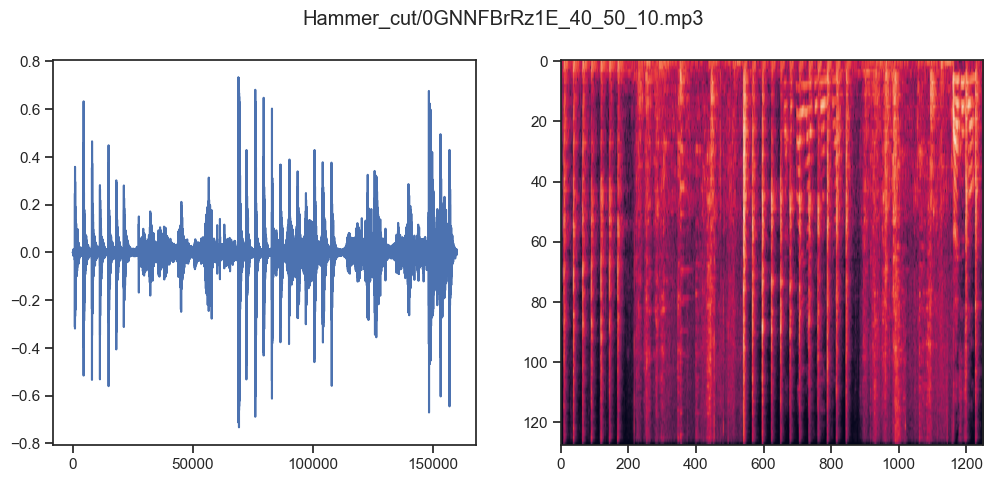

In [18]:
def plot_audio(mp3_path: str) -> None:
    """
    En utilisant matplotlib et create_mel_spectrogram() écrivez une fonction qui prend un mp3_path et trace
    à la fois la forme d'onde (graphique linéaire des amplitudes) et le spectrogramme mel côte à côte en tant que subplots.

    Utilisez le mp3_path comme titre principal unique pour tout le graphique
    """
    y, _ = librosa.load(f"audio/{mp3_path}", sr=sample_rate)
    transformed_m_s = create_mel_spectrogram(mp3_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(mp3_path)

    axes[0].plot(y)
    axes[0].set_xticks([i for i in range(0, len(y)+1, 50000)])
    
    axes[1].imshow(transformed_m_s, aspect='auto')
    axes[1].set_xticks([i for i in range(0, transformed_m_s.shape[1] + 1, 200)])

    plt.show()


plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")